<font size="5"> Amazon Transcribe Accuracy Evaluation Using WER </font>

Install jiwer package

In [46]:
!pip install jiwer

Import wer() function that calculates the word error rate from the jiwer package,
also import other packages that are required in doing data analysis

In [47]:
from jiwer import wer

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read hypothesis text file generated by Amazon Transcribe for different accent

Since this notebook is in the same directory with all the files needed, we read those files directly. All the audio and text files are uploaded in audio-text folder, when you read the file, make sure to add corresponding path to the file name.

In [73]:
with open('accent text.txt', 'r') as reader:
    test = reader.readlines()

Create a dataframe df that has "Text Type", "Accent", and "Speed" for each hypothesis text as variables

In [50]:
wer_data = {'Text Type':[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,
                        1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5],
            'Accent':['French', 'French', 'French', 'French', 'French','Japanese','Japanese','Japanese','Japanese','Japanese','Korean','Korean','Korean','Korean','Korean','Spanish','Spanish','Spanish','Spanish','Spanish','UKS','UKS','UKS','UKS','UKS','USS','USS','USS','USS','USS',
                     'USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS','USS'],
            'Speed':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                     0.5,0.5,0.5,0.5,0.5,0.8,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.0,1.2,1.2,1.2,1.2,1.2,1.5,1.5,1.5,1.5,1.5]}

In [74]:
df = pd.DataFrame(wer_data)
df.head()

,Text Type,Accent,Speed
0,1,French,1.0
1,2,French,1.0
2,3,French,1.0
3,4,French,1.0
4,5,French,1.0


Keep the first 30 entries of df that are data for different accents, store it in df_accent

In [78]:
df_accent = df[:30]

Read the five reference texts, save them into five variables

In [53]:
with open("emoryqss.txt", "r") as reader:
    origin1 = reader.readlines()
with open("emory1.txt", "r") as reader:
    origin2 = reader.readlines()
with open("gatsby.txt", "r") as reader:
    origin3 = reader.readlines()
with open("aws.txt", "r") as reader:
    origin4 = reader.readlines()
with open("biden.txt", "r") as reader:
    origin5 = reader.readlines()

Calculate the WER for each hypothesis text, the result is stored in a list called accent_wer

In [54]:
origin = [origin1, origin2, origin3, origin4, origin5]*6

In [55]:
accent_wer = []

for i in range(30):
    accent_wer.append(wer(origin[i], test[i]))

In [80]:
print(accent_wer)

[0.6336633663366337, 0.48148148148148145, 0.6666666666666666, 0.4262295081967213, 0.45794392523364486, 0.7425742574257426, 0.8296296296296296, 0.803921568627451, 0.6721311475409836, 0.8037383177570093, 0.801980198019802, 0.725925925925926, 0.8823529411764706, 0.5737704918032787, 0.616822429906542, 0.7326732673267327, 0.4148148148148148, 0.45098039215686275, 0.2786885245901639, 0.42990654205607476, 0.26732673267326734, 0.14814814814814814, 0.2549019607843137, 0.14754098360655737, 0.07476635514018691, 0.3069306930693069, 0.14814814814814814, 0.2549019607843137, 0.06557377049180328, 0.07476635514018691]


Add WER values stored in accent_wer to df_accent as column "wer"

In [58]:
df_accent['wer'] = accent_wer
print(df_accent)

    Text Type    Accent  Speed       wer
0           1    French    1.0  0.633663
1           2    French    1.0  0.481481
2           3    French    1.0  0.666667
3           4    French    1.0  0.426230
4           5    French    1.0  0.457944
5           1  Japanese    1.0  0.742574
6           2  Japanese    1.0  0.829630
7           3  Japanese    1.0  0.803922
8           4  Japanese    1.0  0.672131
9           5  Japanese    1.0  0.803738
10          1    Korean    1.0  0.801980
11          2    Korean    1.0  0.725926
12          3    Korean    1.0  0.882353
13          4    Korean    1.0  0.573770
14          5    Korean    1.0  0.616822
15          1   Spanish    1.0  0.732673
16          2   Spanish    1.0  0.414815
17          3   Spanish    1.0  0.450980
18          4   Spanish    1.0  0.278689
19          5   Spanish    1.0  0.429907
20          1       UKS    1.0  0.267327
21          2       UKS    1.0  0.148148
22          3       UKS    1.0  0.254902
23          4   

<ipython-input-58-b1b89866beed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accent['wer'] = accent_wer


Visualize the WER for different accent (colors are for accents)

In [59]:
color1 = ["red"]*5+["yellow"]*5+["blue"]*5+["purple"]*5+["orange"]*5+["black"]*5

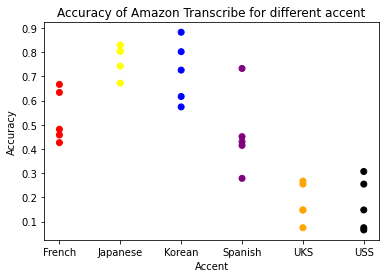

In [60]:
plt.scatter(df_accent['Accent'], df_accent['wer'], c=color1)

plt.xlabel('Accent')
plt.ylabel('Accuracy')
plt.title('Accuracy of Amazon Transcribe for different accent')
plt.show()

<font size="3"> WER for different speed </font>

Read the hypothesis text files

In [61]:
with open('speed text.txt', 'r') as reader:
    test = reader.readlines()

Calculate WER, store the result into list speed_wer

In [62]:
origin = [origin1, origin2, origin3, origin4, origin5]*5

In [63]:
speed_wer = []
for i in range(25):
    speed_wer.append(wer(origin[i], test[i]))

Choose last 25 entries of df that contains data for different speed of speech, store it in df_speed

In [64]:
df_speed = df[30:]

Add WER values stored in speed_wer to df_speed as column "wer"

In [81]:
df_speed['wer'] = speed_wer
df_speed

<ipython-input-81-7980ba22d683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed['wer'] = speed_wer


,Text Type,Accent,Speed,wer
30,1,USS,0.5,0.346535
31,2,USS,0.5,0.170370
32,3,USS,0.5,0.235294
33,4,USS,0.5,0.065574
34,5,USS,0.5,0.074766
35,1,USS,0.8,0.306931
36,2,USS,0.8,0.177778
37,3,USS,0.8,0.254902
38,4,USS,0.8,0.065574
39,5,USS,0.8,0.084112


Visualize WER for different speed of speach

In [66]:
color1 = color1 = ["red"]*5+["yellow"]*5+["blue"]*5+["purple"]*5+["orange"]*5

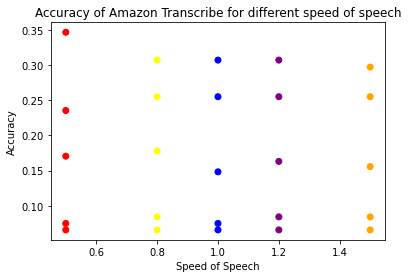

In [72]:
plt.scatter(df_speed['Speed'], df_speed['wer'], c=color1)

plt.xlabel('Speed of Speech')
plt.ylabel('Accuracy')
plt.title('Accuracy of Amazon Transcribe for different speed of speech')
plt.show()

Combine df_accent and df_speed to get the full version of WER data me_wer_df

In [68]:
my_wer_df = df_accent.append(df_speed)
my_wer_df

,Text Type,Accent,Speed,wer
0,1,French,1.0,0.633663
1,2,French,1.0,0.481481
2,3,French,1.0,0.666667
3,4,French,1.0,0.426230
4,5,French,1.0,0.457944
5,1,Japanese,1.0,0.742574
6,2,Japanese,1.0,0.829630
7,3,Japanese,1.0,0.803922
8,4,Japanese,1.0,0.672131
9,5,Japanese,1.0,0.803738


In [69]:
my_wer_df.head(10)

,Text Type,Accent,Speed,wer
0,1,French,1.0,0.633663
1,2,French,1.0,0.481481
2,3,French,1.0,0.666667
3,4,French,1.0,0.426230
4,5,French,1.0,0.457944
5,1,Japanese,1.0,0.742574
6,2,Japanese,1.0,0.829630
7,3,Japanese,1.0,0.803922
8,4,Japanese,1.0,0.672131
9,5,Japanese,1.0,0.803738
